# Load data

In [44]:
import pandas as pd
import numpy as np
import xarray as xr
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [45]:
import pickle 

def pickle_performance(model, name_str, step_window, multi_step_prediction_bool):
  assert type(name_str) is str
  assert type(multi_step_prediction_bool) is bool

  PATH = '/content/drive/My Drive/aivcc_cornvolution/performance'
  if not multi_step_prediction_bool:
    filename = 'single_step_performance'
  else:
    filename = 'multi_step_performance'
  
  with open(os.path.join(PATH, filename), 'rb') as file:
    val_performance, performance = pickle.load(file)

  val_performance[name] = model.evaluate(step_window.val)
  performance[name] = model.evaluate(step_window.test, verbose=0)

  with open(os.path.join(PATH, filename), 'wb') as file:
    pickle.dump((val_performance, performance), file)


In [46]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive")

Mounted at /content/drive


In [47]:
# Load data
input_path = '/content/drive/My Drive/aivcc_cornvolution/data'
gdhy_df = pd.read_pickle(os.path.join(input_path, 'Preprocessed', 'gdhy')).sort_index()

# Clean
gdhy_df.drop(columns=['maize_major', 'maize_second', 'rice_major', 'rice_second','wheat_spring', 'wheat_winter'], inplace=True)


# Set to default dataset (makes code reusable)
df = gdhy_df
df.fillna(0, inplace=True)

In [48]:
df

maize  rice  soybean  wheat
lat    lon    year                             
-89.75 0.25   1981    0.0   0.0      0.0    0.0
              1982    0.0   0.0      0.0    0.0
              1983    0.0   0.0      0.0    0.0
              1984    0.0   0.0      0.0    0.0
              1985    0.0   0.0      0.0    0.0
...                   ...   ...      ...    ...
 89.75 359.75 2012    0.0   0.0      0.0    0.0
              2013    0.0   0.0      0.0    0.0
              2014    0.0   0.0      0.0    0.0
              2015    0.0   0.0      0.0    0.0
              2016    0.0   0.0      0.0    0.0

[9331200 rows x 4 columns]

## Visualize the world map

In [49]:
def get_world_map_as_array(df, year, attribute, resample_factor=None):
  # Only works with full dataframe
  world_map = gdhy_df.loc[:,:, pd.Period(year)][attribute]
  world_array = world_map.fillna(0).to_numpy().reshape((360, 720))

  if resample_factor is not None:
    world_array = zoom(world_array, resample_factor, order=1)

  return world_array

In [50]:
#plt.imshow(get_world_map_as_array(gdhy_df, 2015, 'soybean', 5), cmap='coolwarm', vmax=25, origin='lower')

# Visualize maps

In [56]:
df.columns

Index(['maize', 'rice', 'soybean', 'wheat'], dtype='object')

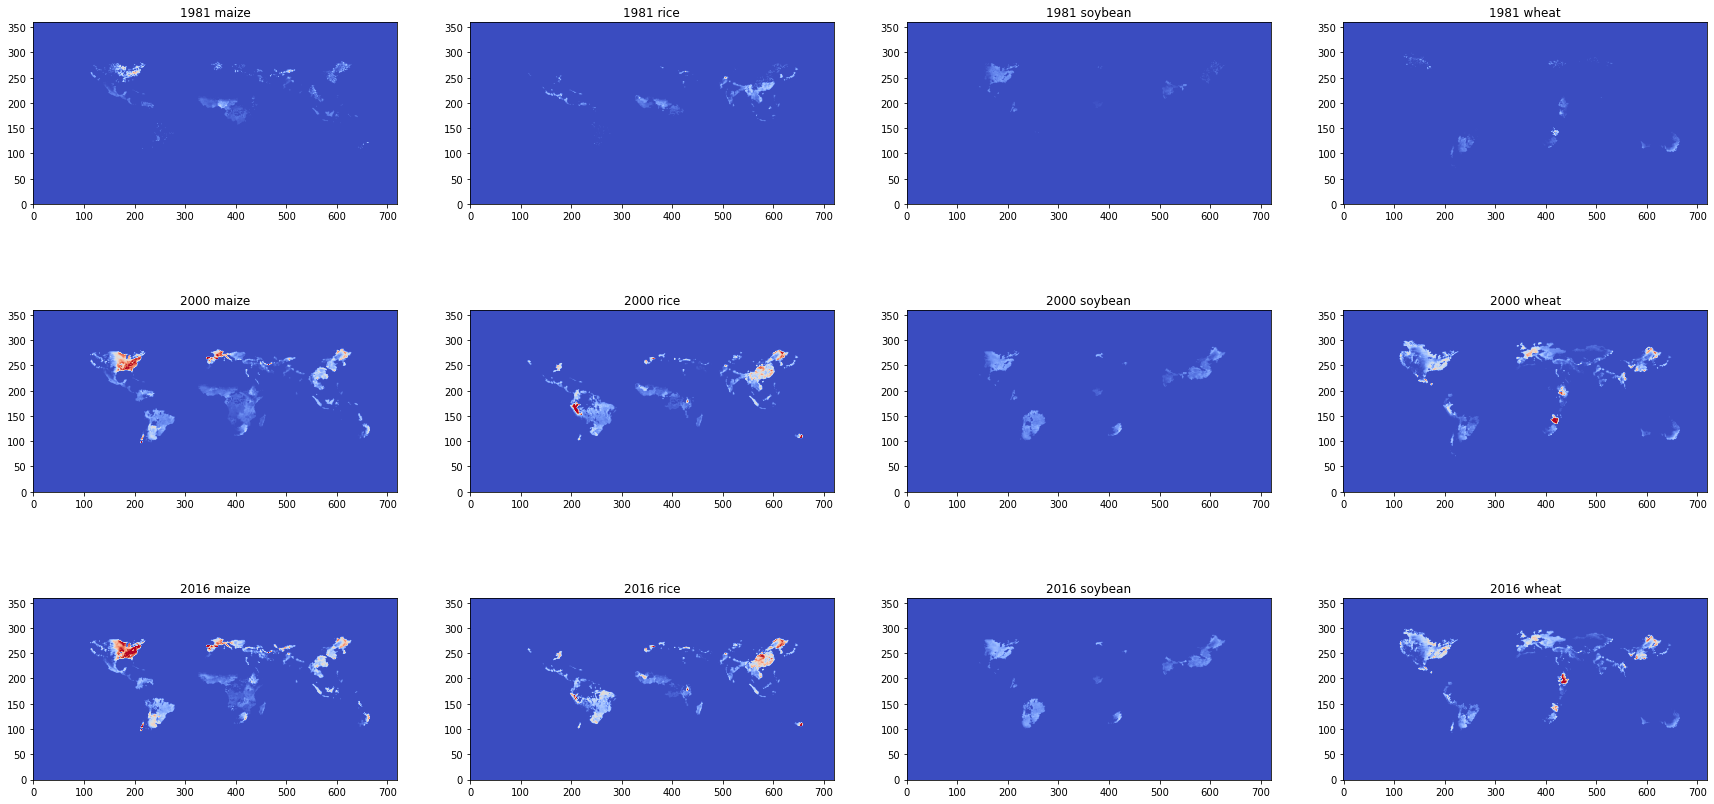

In [62]:
fig, axes = plt.subplots(3,4, figsize=(30,15))

for i, crop in enumerate(df.columns):
  for j, year in enumerate([1981, 2000, 2016]):
    axes[j,i].imshow(np.roll(get_world_map_as_array(df, year, crop), 360, axis=1), cmap='coolwarm', vmax=15, origin='lower')
    axes[j,i].set_title(str(year)+ ' '+ crop)

In [ ]:
df = df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df)
_ = ax.set_xticklabels(df.keys(), rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.
